# Lab 1: Python Fundamentals - DNA Sequences - dna_raw.txt
## Planning and Pseudocode 
<br>
Focus is on Python fundamentals - how to read data from files, process and show results.

### Main Tasks:
**1. File Handling *dna_raw.txt*.**
    <br>
    <br>1.1. Create code that will read the entire file, *line by line.*
    <br>1.2. Transform to all UPPERCASE while in list type.
    <br>1.3. Identify sequence ID's ">" and actual DNA sequence lines. Append to list
    <br>
    <br>
    <br>

**2. Dictionary initialization**
    <br>
    <br>2.1. Initialize an empty key dictionary associated with each DNA sequence (A, T, C, G) and (N).
    <br> 2.3. Count the frequency of each letter per DNA sequence. Store the elements (dna letter) as dictionary keys. Store the counts as dictionary values.
    <br>
    <br>

**3. Graphing and showing results**
    <br>
    <br>3.1. Use the dictionary key-value as the data source for plotting.
    <br>3.2. Graph the counts with Matplotlib.
    <br>
    <br>__________________________________________________________________________________________________________________________________________________

### 1. File Handling *dna_raw.txt*.
#### 1.1. Create code that will read the entire file, *line by line.*
- Use a `for loop` to go through the text file

- Store the output in a variable `dna_sequences`

- `with`
<br>It is good practice to use the `with` keyword when dealing with file objects. The advantage is that the file is properly closed after its suite finished.

- `r`
<br>`r` is for *read*. This lab only needs to read and avoid overwriting the txt.file.

- `encoding="utf-8"`
<br>Because UTF-8 is the modern de-facto standard, `encoding="utf-8"` is recommended.

- `for line in f:`
<br> using a for loop to read line by line, instead of using f.read(), which will print the whole txt.file into one string, which I do not want.
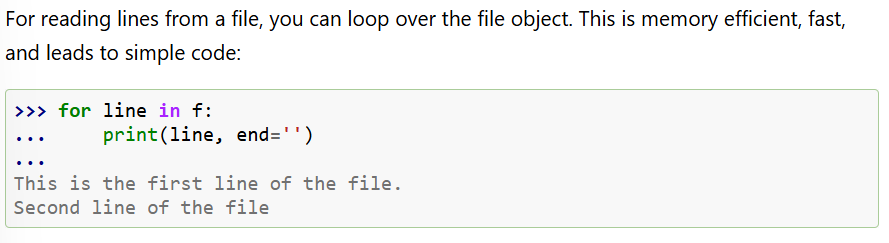

- `line.strip("\n")`
<br> for every *line*, strip all the newlines in front and back.

[Resources]https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files

In [4]:
dna_sequences = {}
with open("dna_raw.txt", "r", encoding = "utf-8") as f:        # file object called "f" is created                            
    for line in f:                                             # for every line in f
        print(line.strip("\n"))                                # strip \n spaces in every line

type(line)           

>seq1
cGTAaccaataaaaaaacaagcttaacctaattc
>seq2
agcttagTTTGGatctggccgggg
>seq3
gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca
>seq4
gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca


str

The current result is a `list`

<br>

#### 1.2 Transform the strings into normalized format (all upper case)
- I think it's best to convert all into `upper()` now before I put the strings into a dictionary since dictionaries are immutable.
<br> This is a resource from our strings class.
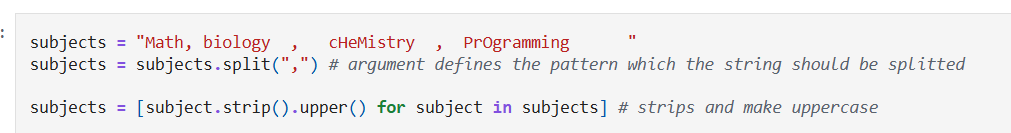

In [5]:
dna_sequences = []

with open ("dna_raw.txt", "r", encoding = "utf-8") as f:
    dna_sequences = [line.strip().upper() for line in f]       # one-line for loop to .upper() I keep the strip()

print(dna_sequences)

['>SEQ1', 'CGTAACCAATAAAAAAACAAGCTTAACCTAATTC', '>SEQ2', 'AGCTTAGTTTGGATCTGGCCGGGG', '>SEQ3', 'GCGGATTTACTCCCCCCAAAAANNAGGGGAGAGCCCAGATAAATGGAGTCTGTGCGTCCACA', '>SEQ4', 'GCGGATTTACTCAGGGGAGAGCCCAGGGATAAATGGAGTCTGTGCGTCCACA']


In [6]:
# The letters are now normalized into all uppercase letters with .upper() and stored into the variable `dna_sequences`.
dna_sequences

['>SEQ1',
 'CGTAACCAATAAAAAAACAAGCTTAACCTAATTC',
 '>SEQ2',
 'AGCTTAGTTTGGATCTGGCCGGGG',
 '>SEQ3',
 'GCGGATTTACTCCCCCCAAAAANNAGGGGAGAGCCCAGATAAATGGAGTCTGTGCGTCCACA',
 '>SEQ4',
 'GCGGATTTACTCAGGGGAGAGCCCAGGGATAAATGGAGTCTGTGCGTCCACA']

<br>

### 1.3. Identify sequence ID's ">" and actual DNA sequence lines.

`if` and `else` method<br>
<br>
- Tell Python `if` line starts with `>` in that one line ---> **dna_id**<br>
    - `else` it is a **dna_letter**. <br>

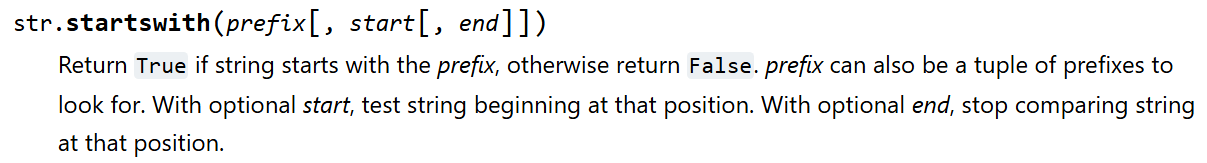
<br>
- Remove the `>` with `lstrip()`

![Screenshot 2025-10-02 101049.png](<attachment:Screenshot 2025-10-02 101049.png>)
<br>
- Save these ID's (seq1, seq2, seq3, seq4) into a dictionary as **keys**.<br>
<br>
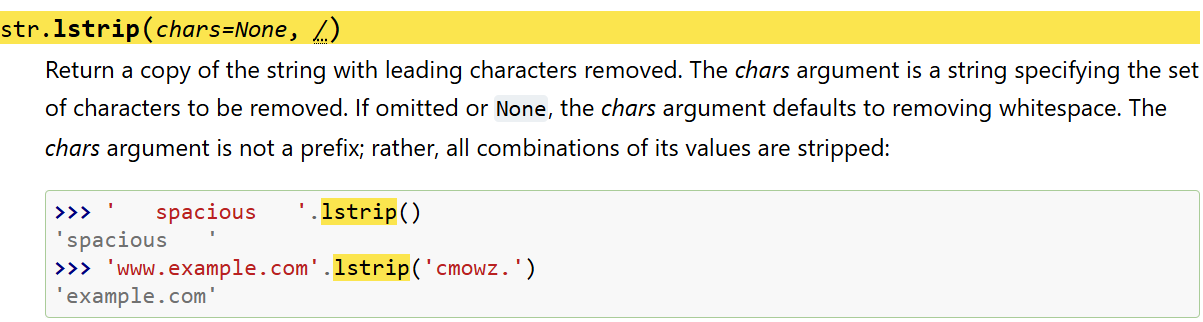

In [7]:
dna_id = []              # list for seq1, seq2, seq3, seq4
dna_letters = []         # list for A,T,C,G,N

# start for loop with startswith function
for line in dna_sequences:
    if line.startswith('>'):              # if '>' exists argument is True
        dna_id.append(line.lstrip('>'))   # lstrip('>') will remove the string given inside the argument. append to 'dna_id' list 
                                          
        
    else:                                 # if startswith('>') argument is False
        dna_letters.append(line)          # append to 'dna_letters' list

print(f'DNA ID: {dna_id}')
print(f'DNA letters: {dna_letters}')

DNA ID: ['SEQ1', 'SEQ2', 'SEQ3', 'SEQ4']
DNA letters: ['CGTAACCAATAAAAAAACAAGCTTAACCTAATTC', 'AGCTTAGTTTGGATCTGGCCGGGG', 'GCGGATTTACTCCCCCCAAAAANNAGGGGAGAGCCCAGATAAATGGAGTCTGTGCGTCCACA', 'GCGGATTTACTCAGGGGAGAGCCCAGGGATAAATGGAGTCTGTGCGTCCACA']


<br>


### **2. Dictionary initialization** 
<br>2.2. Initialize an empty key-value dictionary for with each `dna_letters`: (A, T, C, G) and (N), and `dna_id`: seq 1-4  
<br>Desired Output: `{seq1: DNA sequence}`, `{seq2: DNA sequence}`, `{seq3: DNA sequence}`, `{seq4: DNA sequence}`

In [15]:
dna_id

['SEQ1', 'SEQ2', 'SEQ3', 'SEQ4']

In [13]:
dna_letters

['CGTAACCAATAAAAAAACAAGCTTAACCTAATTC',
 'AGCTTAGTTTGGATCTGGCCGGGG',
 'GCGGATTTACTCCCCCCAAAAANNAGGGGAGAGCCCAGATAAATGGAGTCTGTGCGTCCACA',
 'GCGGATTTACTCAGGGGAGAGCCCAGGGATAAATGGAGTCTGTGCGTCCACA']

<br>2.3. Count the frequency of each letter per DNA sequence. Store the elements (dna letter) as dictionary keys. Store the counts as dictionary values.
<br> Desired Output: `seq1: {'A': num, 'T': num, 'C': num, 'G': num, 'N':num}`

In [17]:
dna_dictionary = {dna_letters:len(dna_letters) for dna_letters in dna_id}
dna_dictionary

{'SEQ1': 4, 'SEQ2': 4, 'SEQ3': 4, 'SEQ4': 4}

### Graph Results
<br>3.1. Use the dictionary key-value as the data source for plotting.
<br>3.2. Graph the counts with Matplotlib.
<br>